In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
path = ''

img_height = 299
img_width = 299
batch_size = 32
epochs=20

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras import models

# 데이터 불러오기

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path+'train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  path+'validation',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12250 files belonging to 2 classes.
Found 5248 files belonging to 2 classes.


In [23]:
class_names = train_ds.class_names
n_class = len(class_names)
print(class_names)

['cats', 'dogs']


# keras 기본 모델

Inception v1 module

functional 방법을 사용하여 접근한다

In [24]:
def inception_module(input_shape, class_num):
  input_layer = keras.Input(shape=input_shape)

  layer_1 = layers.Conv2D(10, (1, 1))(input_layer)

  conv_1 = layers.Conv2D(10, (1,1), padding='same', activation='relu')(input_layer)
  layer_2 = layers.Conv2D(10, (5,5), padding='same', activation='relu')(conv_1)

  conv_1 = layers.Conv2D(10, (1,1), padding='same', activation='relu')(input_layer)
  layer_3 = layers.Conv2D(10, (3,3), padding='same', activation='relu')(conv_1)
  
  conv_1 = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
  layer_4 = layers.Conv2D(10, (1,1), padding='same', activation='relu')(conv_1)

  mid_1 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3, layer_4], axis = 3)

  ouput_layer = layers.Flatten()(mid_1)
  ouput_layer = layers.Dense(class_num, activation='softmax')(ouput_layer)

  model = keras.Model(inputs=input_layer, outputs=ouput_layer)

  return model

In [32]:
model = inception_module((img_height, img_width, 3), 1)
# ---- class수가 2개인데 왜 1개로 했을 때 코드가 돌아가는지 잘 모르겠다;;;

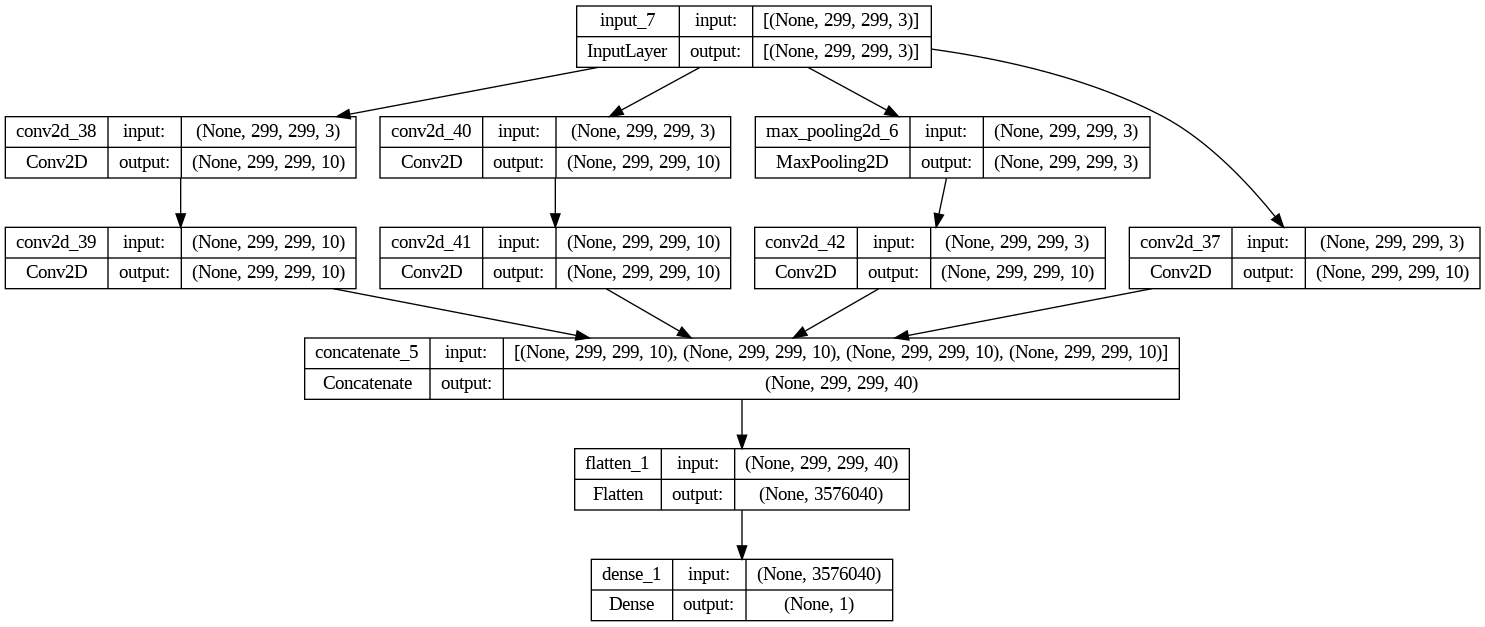

In [33]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# plot_model(model)

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 299, 299, 10  40          ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_40 (Conv2D)             (None, 299, 299, 10  40          ['input_7[0][0]']                
                                )                                                           

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
 23/383 [>.............................] - ETA: 23:37 - loss: 0.0000e+00 - accuracy: 0.4851